In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

In [2]:
import pandas as pd
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Rescaling,Input,Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.models import Sequential
from io import BytesIO
from ipywidgets import widgets

2025-07-19 13:32:17.362788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752931937.608580      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752931937.679023      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
BASE_DIR='/kaggle/input/dogs-vs-cats'
train_dir=os.path.join(BASE_DIR,'/kaggle/input/dogs-vs-cats/train')
validation_dir=os.path.join(BASE_DIR,'/kaggle/input/dogs-vs-cats/test')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [4]:
print(f"Contents of base directory: {os.listdir(BASE_DIR)}")
print(f"\nContents of train directory: {train_dir}")
print(f"\nContents of validation directory: {validation_dir}")


Contents of base directory: ['dogs_vs_cats', 'test', 'train']

Contents of train directory: /kaggle/input/dogs-vs-cats/train

Contents of validation directory: /kaggle/input/dogs-vs-cats/test


In [5]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)

print(f"5 files in cats subdir: {train_cats_fnames[:5]}")
print(f"5 files in dogs subdir: {train_dogs_fnames[:5]}")

5 files in cats subdir: ['cat.12461.jpg', 'cat.10176.jpg', 'cat.8194.jpg', 'cat.3498.jpg', 'cat.891.jpg']
5 files in dogs subdir: ['dog.3443.jpg', 'dog.7971.jpg', 'dog.10728.jpg', 'dog.1942.jpg', 'dog.3259.jpg']


In [6]:
print(f'Total training cat images: {len(os.listdir(train_cats_dir))}')
print(f'Total training dog images: {len(os.listdir(train_dogs_dir))}')

print(f'Total validation cat images: {len(os.listdir(validation_cats_dir))}')
print(f'Total validation dog images: {len(os.listdir(validation_dogs_dir))}')

Total training cat images: 10000
Total training dog images: 10000
Total validation cat images: 2500
Total validation dog images: 2500


In [7]:
model=Sequential([
    Input(shape=(150,150,3)),
    Rescaling(scale=(1./255)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

I0000 00:00:1752931951.377316      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'],
              loss='binary_crossentropy'  
             )

In [10]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=(20),
    label_mode='binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
SHUFFLE_BUFFER_SIZE=1000
PREFETCH_BUFFER_SIZE=tf.data.AUTOTUNE

train_dataset_final=train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final=validation_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [12]:
history=model.fit(
    train_dataset_final,
    epochs=15,
    validation_data=validation_dataset_final,
    verbose=2
)

Epoch 1/15


I0000 00:00:1752931996.915415      62 service.cc:148] XLA service 0x78571c00b2a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752931996.916565      62 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752931997.186575      62 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752931999.356973      62 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 - 48s - 48ms/step - accuracy: 0.6790 - loss: 0.5899 - val_accuracy: 0.7598 - val_loss: 0.4861
Epoch 2/15
1000/1000 - 6s - 6ms/step - accuracy: 0.7763 - loss: 0.4688 - val_accuracy: 0.8036 - val_loss: 0.4260
Epoch 3/15
1000/1000 - 6s - 6ms/step - accuracy: 0.8228 - loss: 0.3916 - val_accuracy: 0.8206 - val_loss: 0.4141
Epoch 4/15
1000/1000 - 6s - 6ms/step - accuracy: 0.8631 - loss: 0.3136 - val_accuracy: 0.8230 - val_loss: 0.4124
Epoch 5/15
1000/1000 - 7s - 7ms/step - accuracy: 0.9090 - loss: 0.2234 - val_accuracy: 0.8180 - val_loss: 0.4526
Epoch 6/15
1000/1000 - 6s - 6ms/step - accuracy: 0.9513 - loss: 0.1255 - val_accuracy: 0.8388 - val_loss: 0.5137
Epoch 7/15
1000/1000 - 7s - 7ms/step - accuracy: 0.9765 - loss: 0.0648 - val_accuracy: 0.8208 - val_loss: 0.7138
Epoch 8/15
1000/1000 - 7s - 7ms/step - accuracy: 0.9875 - loss: 0.0375 - val_accuracy: 0.8366 - val_loss: 0.8764
Epoch 9/15
1000/1000 - 6s - 6ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.8154 - val_loss:

In [13]:

uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")


def on_upload_change(change):
    
    items = change.new
    for item in items:
        file_jpgdata = BytesIO(item.content)
        


FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


/tmp/ipykernel_19/1211776280.py:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()
/tmp/ipykernel_19/1211776280.py:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


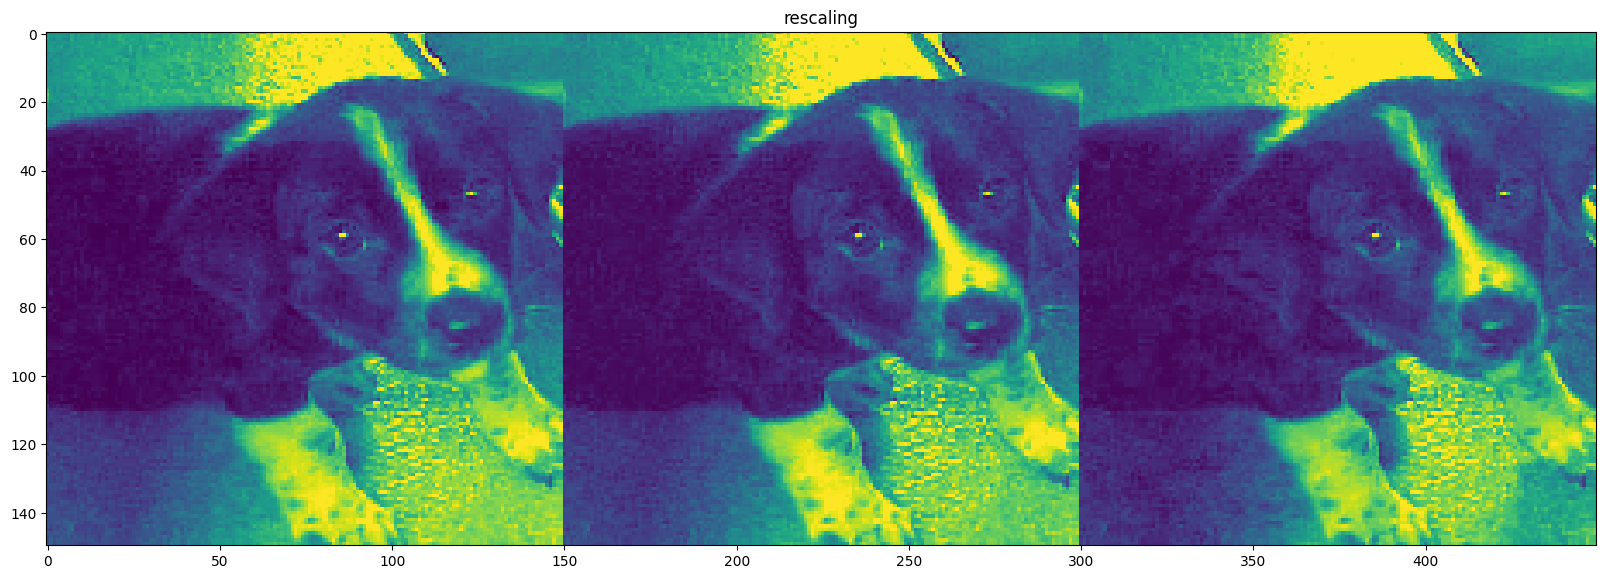

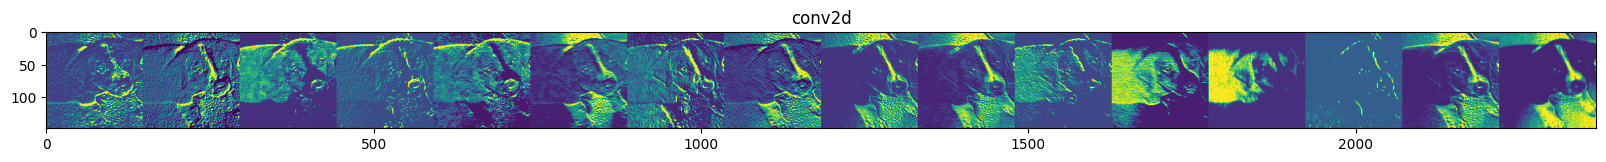

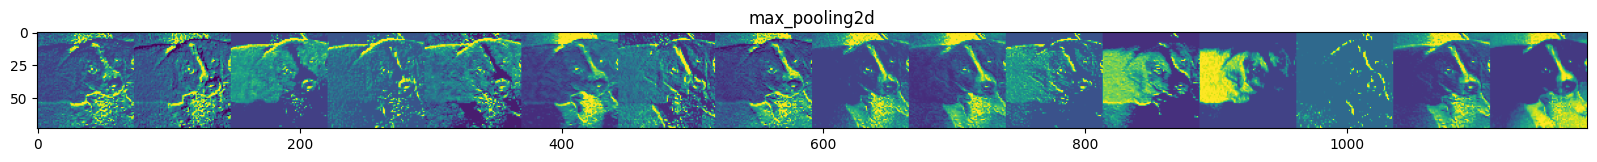

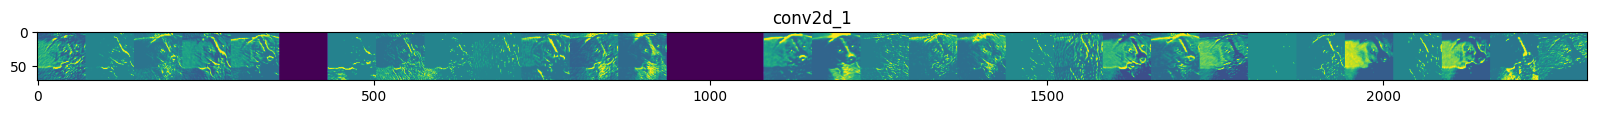

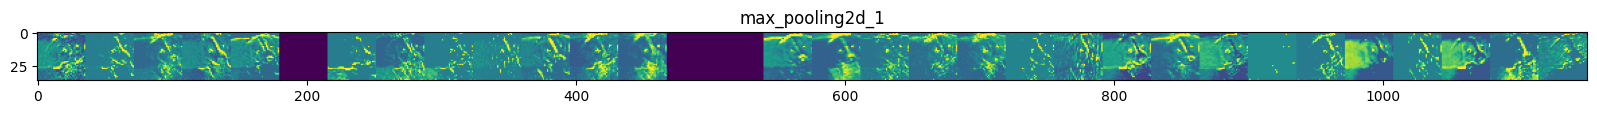

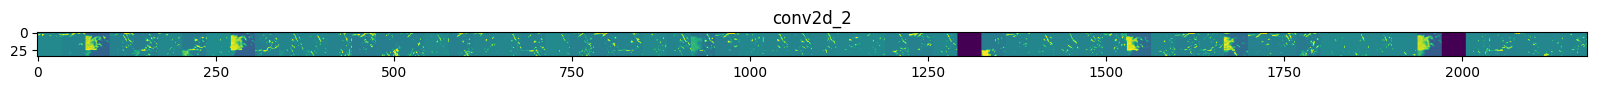

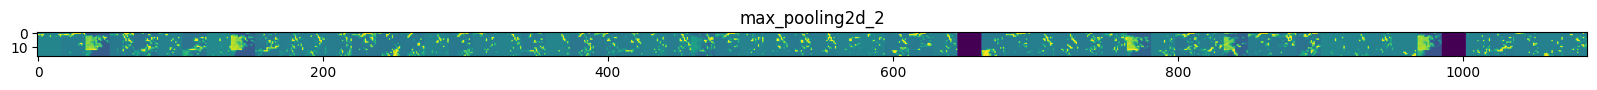

In [14]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = tf.keras.utils.img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

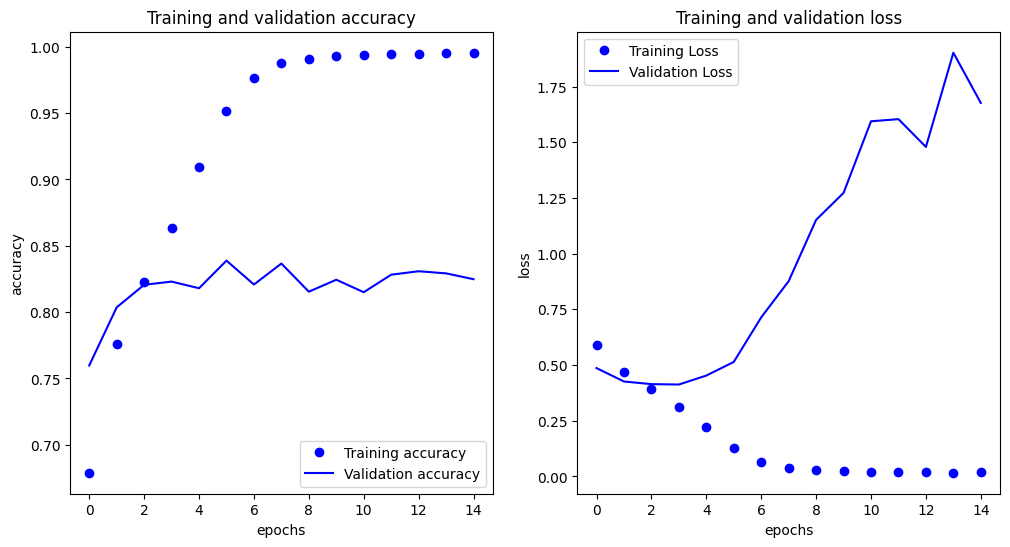

In [15]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)